<a href="https://colab.research.google.com/github/ishaan-m/hello-world/blob/master/Forevision_Financial_use_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Data 

###Import Modules

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plot style
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

###Read Data

In [3]:
url='https://raw.githubusercontent.com/ishaan-m/Stock-Data/master/Stocks%20Data.csv'
df=pd.read_csv(url)

###Basic info on the DATA

In [4]:
df.head()

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Total Current Assets,Total Current Liabilities,Cash and Equivalent,Operating Cash Flow,Total Assets,Total Liabilities,Total Equity,Net Income,Dividend Per Share
0,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,777400.301466,2072.05,24.026554,90237.00,27060.00,35806.00,32369.00,120120.00,35371.00,84749.00,32340.00,73.00
1,Hindustan Unilever Ltd,HINDUNILVR,FMCG -Household Products,496154.482369,2106.50,67.429577,12321.00,9317.00,6366.00,7623.00,20153.00,11907.00,8246.00,6748.00,25.00
2,Infosys Ltd,INFY,IT Services & Consulting,305703.007553,717.60,18.352941,54576.00,20856.00,23304.00,17003.00,91800.00,25956.00,65844.00,16594.00,17.50
3,ITC Ltd,ITC,FMCG - Tobacco,242955.950478,198.50,19.328140,31747.27,10011.99,17499.53,12583.41,71739.04,12254.70,59484.34,12592.33,5.75
4,Nestle India Ltd,NESTLEIND,FMCG - Foods,162327.427772,16552.55,81.029979,3817.17,2147.51,2315.50,2233.67,7058.20,5125.94,1932.26,1969.55,342.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       46 non-null     object 
 1   Ticker                     46 non-null     object 
 2   Sub-Sector                 46 non-null     object 
 3   Market Cap                 46 non-null     float64
 4   Share Price                46 non-null     float64
 5   PE Ratio                   46 non-null     float64
 6   Total Current Assets       46 non-null     float64
 7   Total Current Liabilities  46 non-null     float64
 8   Cash and Equivalent        46 non-null     float64
 9   Operating Cash Flow        46 non-null     float64
 10  Total Assets               46 non-null     float64
 11  Total Liabilities          46 non-null     float64
 12  Total Equity               46 non-null     float64
 13  Net Income                 46 non-null     float64
 

In [7]:
df.rename(columns={'Close Price':'Share Price'},inplace=True)

In [9]:
#imp (*see what happens if run twice)
df['Current Ratio']=df['Total Current Assets']/df['Total Current Liabilities']
df['Cash Ratio']=df['Cash and Equivalent']/df['Total Current Liabilities']
df['Operating Cash Flow Ratio']=df['Operating Cash Flow']/df['Total Current Liabilities']
df['Debt Ratio']=df['Total Assets']/df['Total Liabilities']
df['Return on Assets ratio']=df['Net Income']/df['Total Assets']
df['Dividend Yield']=df['Dividend Per Share']/df['Share Price']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       46 non-null     object 
 1   Ticker                     46 non-null     object 
 2   Sub-Sector                 46 non-null     object 
 3   Market Cap                 46 non-null     float64
 4   Share Price                46 non-null     float64
 5   PE Ratio                   46 non-null     float64
 6   Total Current Assets       46 non-null     float64
 7   Total Current Liabilities  46 non-null     float64
 8   Cash and Equivalent        46 non-null     float64
 9   Operating Cash Flow        46 non-null     float64
 10  Total Assets               46 non-null     float64
 11  Total Liabilities          46 non-null     float64
 12  Total Equity               46 non-null     float64
 13  Net Income                 46 non-null     float64
 

In [10]:
df.head()

,Name,Ticker,Sub-Sector,Market Cap,Share Price,PE Ratio,Total Current Assets,Total Current Liabilities,Cash and Equivalent,Operating Cash Flow,Total Assets,Total Liabilities,Total Equity,Net Income,Dividend Per Share,Current Ratio,Cash Ratio,Operating Cash Flow Ratio,Debt Ratio,Return on Assets ratio,Dividend Yield
0,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,777400.301466,2072.05,24.026554,90237.00,27060.00,35806.00,32369.00,120120.00,35371.00,84749.00,32340.00,73.00,3.334701,1.323208,1.196194,3.396002,0.269231,0.035231
1,Hindustan Unilever Ltd,HINDUNILVR,FMCG -Household Products,496154.482369,2106.50,67.429577,12321.00,9317.00,6366.00,7623.00,20153.00,11907.00,8246.00,6748.00,25.00,1.322421,0.683267,0.818182,1.692534,0.334838,0.011868
2,Infosys Ltd,INFY,IT Services & Consulting,305703.007553,717.60,18.352941,54576.00,20856.00,23304.00,17003.00,91800.00,25956.00,65844.00,16594.00,17.50,2.616801,1.117376,0.815257,3.536755,0.180763,0.024387
3,ITC Ltd,ITC,FMCG - Tobacco,242955.950478,198.50,19.328140,31747.27,10011.99,17499.53,12583.41,71739.04,12254.70,59484.34,12592.33,5.75,3.170925,1.747857,1.256834,5.854002,0.175530,0.028967
4,Nestle India Ltd,NESTLEIND,FMCG - Foods,162327.427772,16552.55,81.029979,3817.17,2147.51,2315.50,2233.67,7058.20,5125.94,1932.26,1969.55,342.00,1.777486,1.078225,1.040121,1.376957,0.279044,0.020661


In [16]:
#high dividend yield stocks
df2=df[df['Dividend Yield']>.075]
df2

,Name,Ticker,Sub-Sector,Market Cap,Share Price,PE Ratio,Total Current Assets,Total Current Liabilities,Cash and Equivalent,Operating Cash Flow,Total Assets,Total Liabilities,Total Equity,Net Income,Dividend Per Share,Current Ratio,Cash Ratio,Operating Cash Flow Ratio,Debt Ratio,Return on Assets ratio,Dividend Yield
6,Oil and Natural Gas Corporation Ltd,ONGC,Oil & Gas - Exploration & Production,114417.639379,90.00,3.712871,90891.18,129846.91,10187.19,61248.46,494786.36,258539.39,236246.97,30494.95,7.00,0.699987,0.078455,0.471697,1.913776,0.061633,0.077778
8,Coal India Ltd,COALINDIA,Mining - Coal,90407.224557,144.30,5.093540,69319.66,45812.18,32874.19,16695.46,132718.83,105858.13,26860.70,17461.85,13.10,1.513127,0.717586,0.364433,1.253742,0.131570,0.090783
10,Indian Oil Corporation Ltd,IOC,Oil & Gas - Refining & Marketing,87645.819564,90.65,4.788695,129754.32,160924.57,9481.58,14133.04,335360.80,221014.20,114346.60,17376.70,9.25,0.806305,0.058919,0.087824,1.517372,0.051815,0.102041
27,Hindustan Petroleum Corp Ltd,HINDPETRO,Oil & Gas - Refining & Marketing,32983.140718,211.65,4.821185,43472.78,57129.46,5302.26,8554.03,107266.04,76865.38,30400.66,6690.63,15.90,0.760952,0.092811,0.149731,1.395505,0.062374,0.075124
45,Indiabulls Housing Finance Ltd,IBULHSGFIN,Home Financing,6245.693956,144.50,1.509769,17189.67,12527.92,14621.25,21206.01,130103.92,113621.80,16482.12,4090.53,40.00,1.372109,1.167093,1.692700,1.145061,0.031440,0.276817


###Exploratory Data Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text major ticklabel objects>)

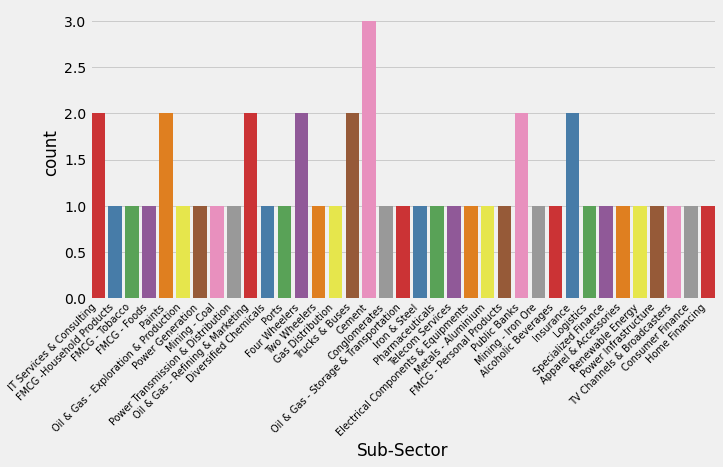

In [23]:
#show number of stocks of each sector on a countplot
plt.figure(figsize=(10,5))
chart=sns.countplot(data=df,x='Sub-Sector',palette='Set1')
plt.xticks(rotation=45,horizontalalignment='right',fontsize='x-small')

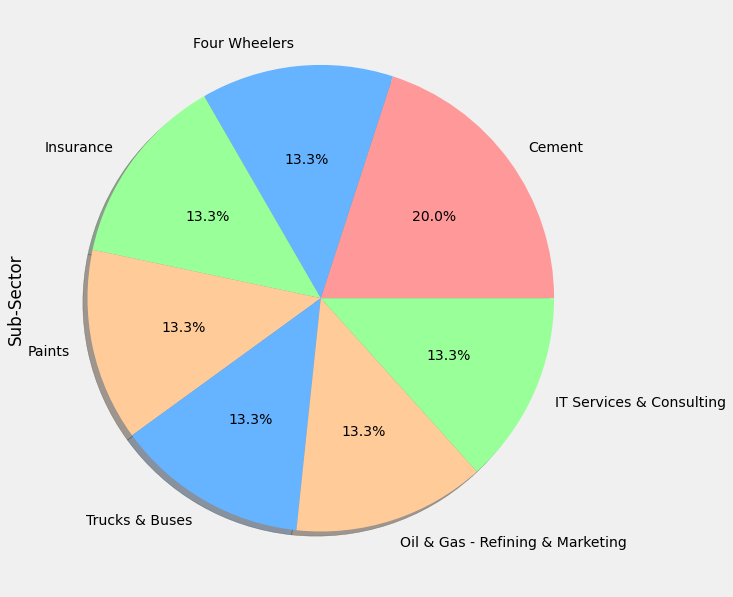

In [30]:
#show top 7 sectors on a pie chart
top7=df['Sub-Sector'].value_counts()
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#66b3ff','#ffcc99','#99ff99']
top7[0:7].plot.pie(autopct='%1.1f%%',shadow=True,figsize=(12,10),colors=colors)
plt.show()

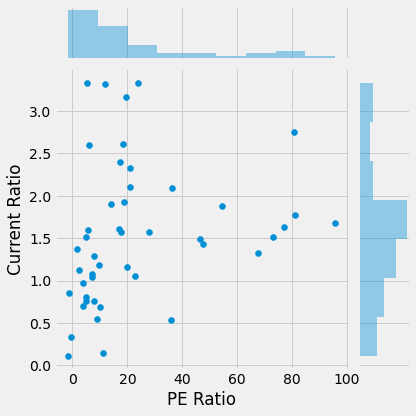

In [33]:
fig=sns.jointplot(x='PE Ratio',y='Current Ratio',data=df)


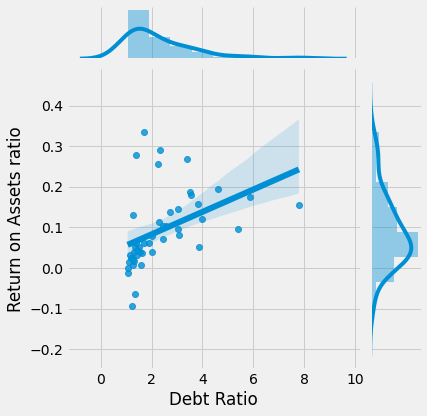

In [35]:
fig=sns.jointplot(x='Debt Ratio',y='Return on Assets ratio',data=df,kind='reg')

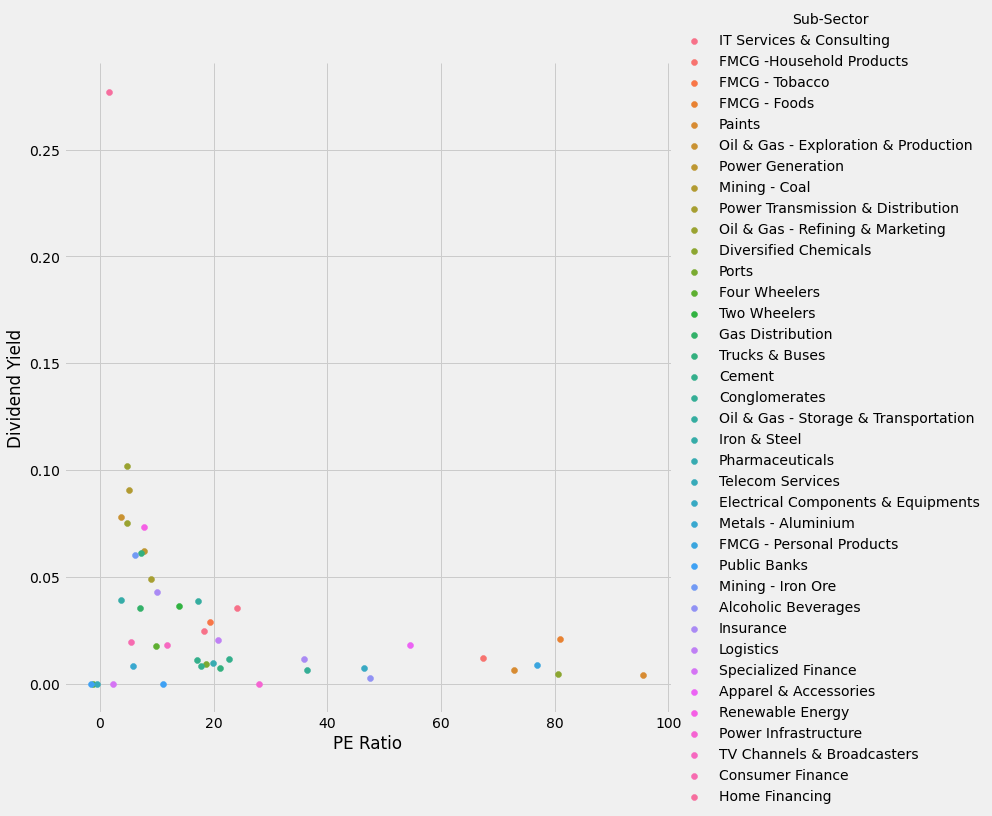

In [42]:
#FacetGrid plot of PE Ratio to Dividend Yield on each sub sector
sns.FacetGrid(df,hue='Sub-Sector',size=10).map(plt.scatter,'PE Ratio','Dividend Yield').add_legend()

###Cleaning Up

In [44]:
df.drop('Total Assets',axis=1)
df.drop('Return on Assets ratio',axis=1)

,Name,Ticker,Sub-Sector,Market Cap,Share Price,PE Ratio,Total Current Assets,Total Current Liabilities,Cash and Equivalent,Operating Cash Flow,Total Assets,Total Liabilities,Total Equity,Net Income,Dividend Per Share,Current Ratio,Cash Ratio,Operating Cash Flow Ratio,Debt Ratio,Dividend Yield
0,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,777400.301466,2072.05,24.026554,90237.0000,27060.00,35806.0000,32369.00,120120.0000,35371.0000,84749.00,32340.00,73.00,3.334701,1.323208,1.196194,3.396002,0.035231
1,Hindustan Unilever Ltd,HINDUNILVR,FMCG -Household Products,496154.482369,2106.50,67.429577,12321.0000,9317.00,6366.0000,7623.00,20153.0000,11907.0000,8246.00,6748.00,25.00,1.322421,0.683267,0.818182,1.692534,0.011868
2,Infosys Ltd,INFY,IT Services & Consulting,305703.007553,717.60,18.352941,54576.0000,20856.00,23304.0000,17003.00,91800.0000,25956.0000,65844.00,16594.00,17.50,2.616801,1.117376,0.815257,3.536755,0.024387
3,ITC Ltd,ITC,FMCG - Tobacco,242955.950478,198.50,19.328140,31747.2700,10011.99,17499.5300,12583.41,71739.0400,12254.7000,59484.34,12592.33,5.75,3.170925,1.747857,1.256834,5.854002,0.028967
4,Nestle India Ltd,NESTLEIND,FMCG - Foods,162327.427772,16552.55,81.029979,3817.1700,2147.51,2315.5000,2233.67,7058.2000,5125.9400,1932.26,1969.55,342.00,1.777486,1.078225,1.040121,1.376957,0.020661
5,Asian Paints Ltd,ASIANPAINT,Paints,156756.898831,1642.05,72.947579,7634.0500,5028.87,1619.4100,2214.27,15633.2900,5750.5500,9882.74,2159.49,10.50,1.518045,0.322023,0.440312,2.718573,0.006394
6,Oil and Natural Gas Corporation Ltd,ONGC,Oil & Gas - Exploration & Production,114417.639379,90.00,3.712871,90891.1800,129846.91,10187.1900,61248.46,494786.3600,258539.3900,236246.97,30494.95,7.00,0.699987,0.078455,0.471697,1.913776,0.077778
7,NTPC Ltd,NTPC,Power Generation,97510.861994,98.00,7.674236,45751.2600,59982.36,2782.3200,16367.13,317649.0000,206947.1800,110701.82,12640.02,6.08,0.762745,0.046386,0.272866,1.534928,0.062041
8,Coal India Ltd,COALINDIA,Mining - Coal,90407.224557,144.30,5.093540,69319.6600,45812.18,32874.1900,16695.46,132718.8300,105858.1300,26860.70,17461.85,13.10,1.513127,0.717586,0.364433,1.253742,0.090783
9,Power Grid Corporation of India Ltd,POWERGRID,Power Transmission & Distribution,90166.447583,170.55,8.892075,17684.6000,32637.64,4336.6500,23380.67,247380.3000,188291.9100,59088.39,10033.52,8.33,0.541847,0.132873,0.716371,1.313813,0.048842
